In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 

In [5]:
df = pd.read_csv('HeightWeight.csv', index_col=0)

In [25]:
df.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<Axes: xlabel='Weight(Pounds)', ylabel='Height(Inches)'>

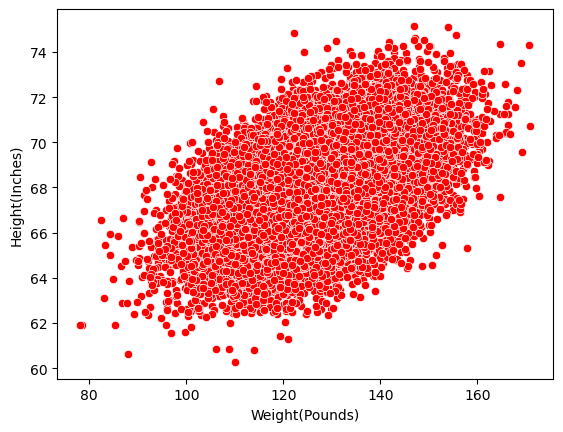

In [26]:
sns.scatterplot(data=df, x='Weight(Pounds)', y='Height(Inches)', color='red')

<Axes: >

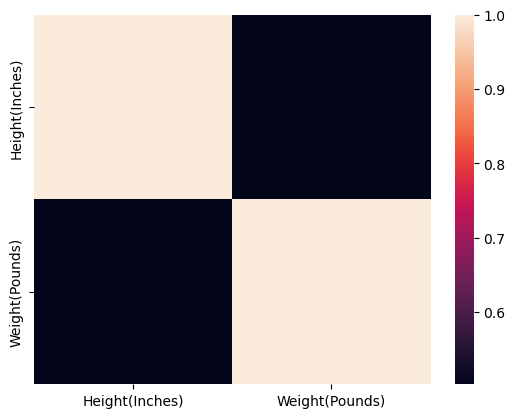

In [27]:
sns.heatmap(df.corr())

c:\Users\anjal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


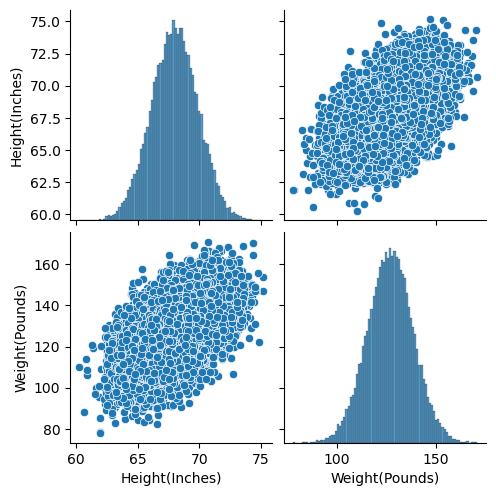

In [28]:
sns.pairplot(df)

In [34]:
# Prepare your independant and dependant variables
## Independent features should be 2D - Dataframe or 2D array
## Dependent features should be 1D 

X = df[['Weight(Pounds)']]
y = df['Height(Inches)']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
# Standardisation 
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)

array([[ 0.08310666],
       [-0.99311816],
       [ 0.50040551],
       ...,
       [-0.52354516],
       [ 0.73759547],
       [-0.36861454]])

In [41]:
regression = LinearRegression(n_jobs=-1) # n_job = -1 means we use all CPU resources to make the calculation faster 
regression.fit(X_train, y_train)

LinearRegression()

In [46]:
print('The coefficient or slope is ', round(regression.coef_[0], 2))
print('The intercept is ', round(regression.intercept_, 2))

The coefficient or slope is  0.08
The intercept is  57.63


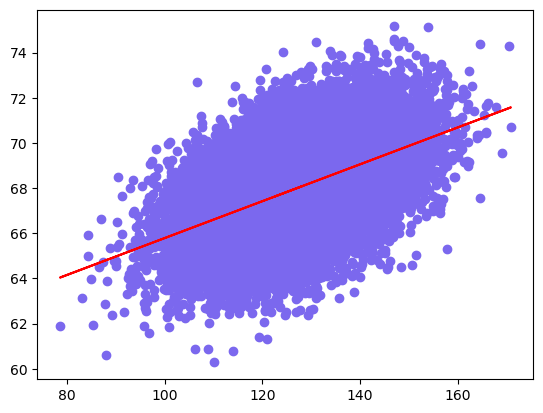

In [64]:
# Plotting the Regression Fit 
plt.scatter(x=X_train, y=y_train, color='mediumslateblue')
plt.plot(X_train, regression.predict(X_train), color='red')

In [66]:
# Predicted values 
y_pred = regression.predict(X_test)

In [67]:
# PERFORMANCE METRICS 

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [87]:
mse = round(mean_squared_error(y_pred=y_pred,y_true=y_test), 2)
mae = round(mean_absolute_error(y_pred=y_pred, y_true=y_test), 2)
rmse = round(mse**(1/2), 2)

print(f'Mean Squared Error: {mse} \nMean Absolute Error: {mae} \nRoot Mean Squared Error: {rmse}')

Mean Squared Error: 2.73 
Mean Absolute Error: 1.32 
Root Mean Squared Error: 1.65


In [96]:
# R-squared
from sklearn.metrics import r2_score

r2 = round(r2_score(y_pred=y_pred, y_true=y_test), 4)

print(f'R2 score: {r2}')

R2 score: 0.2593


In [97]:
# Adjusted R-squared 
round(1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 4)

0.2592

In [98]:
# Regression with OLS Method 

import statsmodels.api as sm

In [102]:
ols_model = sm.OLS(y_train, X_train).fit()
prediction = ols_model.predict(X_test)

In [103]:
print(prediction)

Index
6869     71.349372
24017    59.490761
9669     72.253476
13641    67.149081
14019    53.228766
           ...    
24718    55.804528
2579     78.717375
10122    72.083877
21602    60.298908
3475     67.530413
Length: 6250, dtype: float64


In [104]:
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.847e+06
Date:                Mon, 14 Oct 2024   Prob (F-statistic):                        0.00
Time:                        03:17:19   Log-Likelihood:                         -58576.
No. Observations:               18750   AIC:                                  1.172e+05
Df Residuals:                   18749   BIC:                                  1.172e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [111]:
# Prediction for new data 

regression.predict(scalar.transform([[72]])) 

c:\Users\anjal\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\anjal\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.23962128])